# Content
**01. 라이브러리 로드하고 한글폰트 설정하기**

## 학습목표
- 데이터 분석을 위한 라이브러리 로드방법 익히기
- 한글 폰트를 설정하는 방법 알아보기

## 핵심키워드
- pandas
- numpy
- seaborn
- matplotlib

## 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?

## 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
- 분석을 통해 가설을 검정해 봅시다.

## 3. 라이브러리 로드

In [1]:
# pandas: 분석 사용
# numpy: 수치계산
# seaborn: 시각화
# 구버전의 jupyter notebook 에서는 %matplotlib inline 설정되있어야 노트북안에서 그래프를 시각화합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 4. 한글폰트 설정

In [2]:
# Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# 로컬아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# 나눔고딕 설치
# 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요.
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname = fontpath, size = 9)
# fm._rebuild()

# Colab 의 한글 폰트 설정
# plt.rc('font', family = 'NanumGothic')
import os
os.name

if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('axes', unicode_minus = False)

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 5. 데이터 불러오기
- 건강검진정보란 2002년부터 2013년까지의 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주민 지역가입자와 40세 이상 가입자의 일반겅강검진 결과와 이들 일반건강검진 대상자 중에 만 40세와 만 66세에 도달한 이들이 받게 되는 생애전환기검강검진 수가 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터이다.

공공데이터 개방서비스(http://nhiss.nhis.or.kr/op/it/index.do) 에서도 다운받을 수 있음
- 건강검진정보(2017) 다운로드 받기 : https://www.data.go.kr/dataset/15007122/fileData.do
- 2018년 데이터로 실습을 하셔도 됩니다. 다만 encoding과 컬럼명이 달라서 2018년 데이터에 맞게 고쳐주시면 됩니다.
- 2018년 외 다른 연도의 데이터로도 실습을 하고자 한다면 컬럼명과 인코딩에 주의해 주세요.

In [3]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.
df = pd.read_csv('dataset.csv', encoding = 'cp949')
df.shape

(1000000, 34)

#### 5-1 데이터 미리보기

In [4]:
# pandas 모든 컬럼명 출력하기
pd.set_option('display.max_columns', 100)

In [5]:
df.head(3)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [6]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [7]:
df.head?

Signature: df.head(n: int = 5) -> ~FrameOrSeries
Docstring:
Return the first `n` rows.

This function returns the first `n` rows for the object based
on position. It is useful for quickly testing if your object
has the right type of data in it.

For negative values of `n`, this function returns all rows except
the last `n` rows, equivalent to ``df[:-n]``.

Parameters
----------
n : int, default 5
    Number of rows to select.

Returns
-------
same type as caller
    The first `n` rows of the caller object.

See Also
--------
DataFrame.tail: Returns the last `n` rows.

Examples
--------
>>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
>>> df
      animal
0  alligator
1        bee
2     falcon
3       lion
4     monkey
5     parrot
6      shark
7      whale
8      zebra

Viewing the first 5 lines

>>> df.head()
      animal
0  alligator
1        bee
2     falcon
3       lion
4     monkey

Viewi

In [8]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
809422,2017,809423,1,7,41,170,65,77.0,1.0,1.0,1.0,1.0,124.0,84.0,81.0,149.0,53.0,73.0,65.0,13.7,1.0,0.9,12.0,10.0,25.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


## 6. 기본정보 보기

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [10]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다.
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [11]:
# dtypes 를 통해 데이터 형식만 출력합니다.
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

## 7. 결측치 보기
- 학습목표
    - 데이터셋을 요약하고, 집계하는 방법
- 핵심 키워드
    - df.isnull().sum() / df.isna().sum()
    - df.isnull().sum().plot_barh()
    - df.describe()
    - df.value_counts()

In [12]:
# isnull 을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다 결측치 수를 세어줍니다.
# python
# True = 1
# False = 0
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

In [13]:
# isna 로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

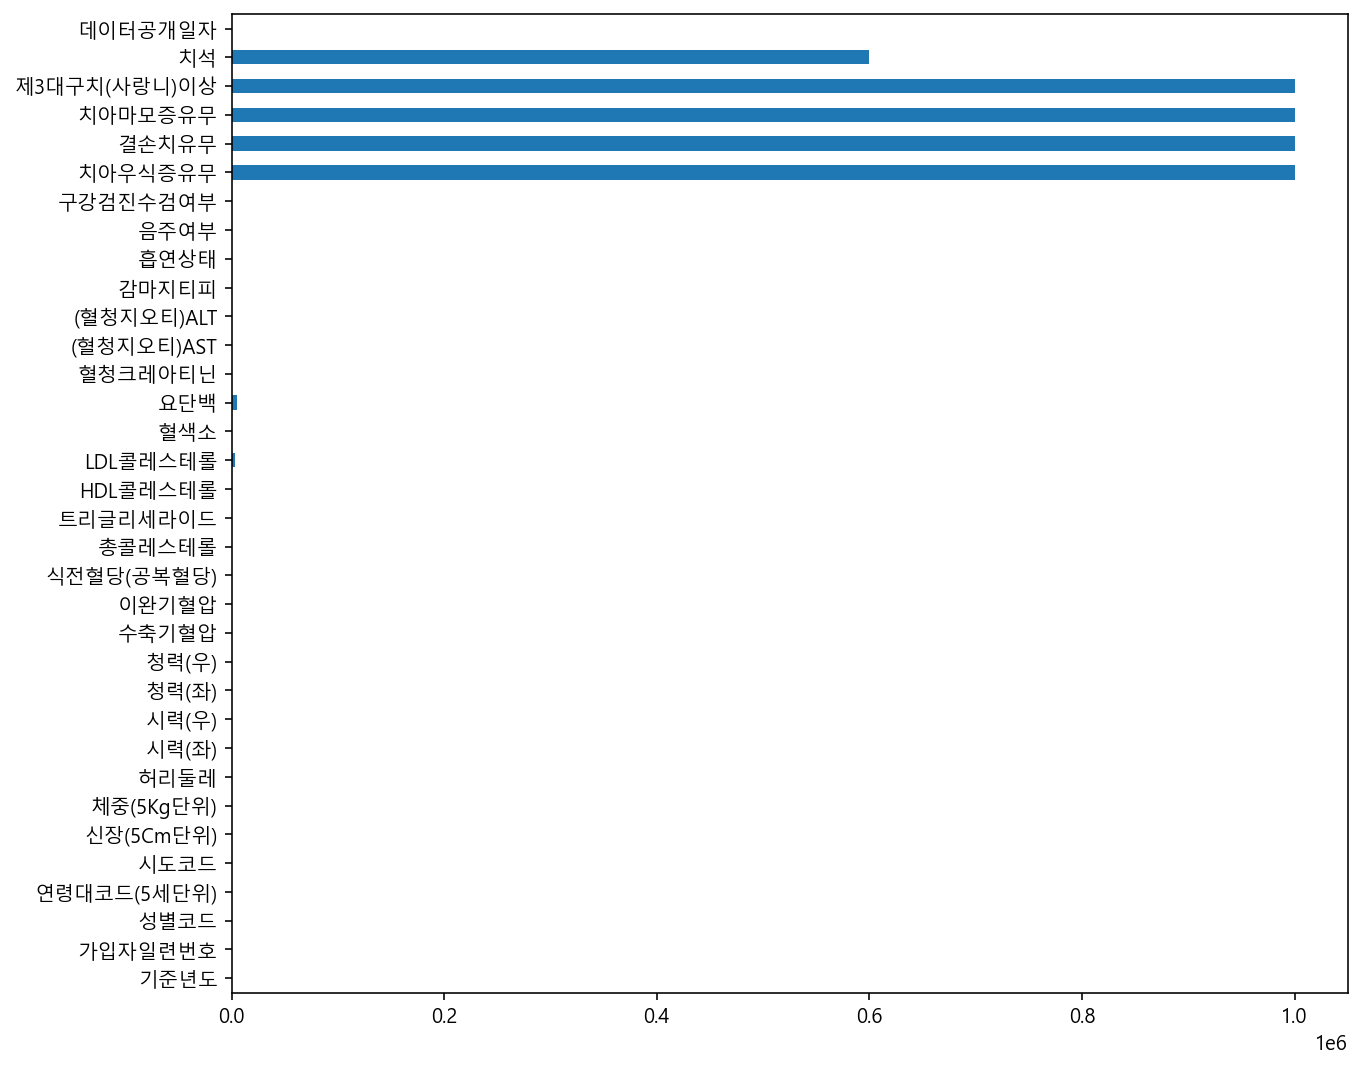

In [14]:
# 판다스에 내장 된 plot을 통해 시각화를 합시다.
df.isnull().sum().plot.barh(figsize = (10, 9))

## 8. 일부 데이터 요약하기

In [15]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [16]:
# 여러 컬럼을 가져옵니다.
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와 미리보기 합니다.
# df[['혈청지오티(ALT)', '(혈청지오티)AST']].head(3)
df[['(혈청지오티)ALT', '(혈청지오티)AST']].head(3)

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0


In [17]:
# 가져온 데이터를 요약해봅니다.
# df[['(혈청지오티)ALT', '(혈청지오티)AST']].info()
df[['(혈청지오티)ALT', '(혈청지오티)AST']].describe() # 이상치가 검출된다. (평균은 20대인데 맥스값이 9999가 있음)

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


## 9. value_counts 로 값 집계하기

In [18]:
# value_counts 를 통해 성별코드로 그룹화하고 갯수를 집계합니다.
df['성별코드'].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [19]:
# value_counts 를 통해 흡연상태로 그룹화 하고 갯수를 집계합니다.
df['흡연상태'].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

## 10. groupby 와 pivot_table 사용하기
- 학습목표
    - groupby 와 pivot_table 사용방법 이해
    - groupby 와 pivot_table 차이점 이해
        - groupby
            - 속도가 더 빠름.
            - Series 로 반환한다. ( 아닌경우도 있음 )
        - pivot_table
            - DataFrame 으로 반환한다.
            - 사용법이 직관적이다.
            - 속도가 더 느리다.
        
- 핵심 키워드
    - df.groupby()
    - df.pivot_table()

### 10-1 groupby

In [20]:
# groupby 를 통해 데이터를 그룹화 합니다.
# 성별코드로 그룹화 한 데이터를 세어 봅니다.
df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [21]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [22]:
# 성별코드와 음주여부로 그룹화하고, 감마지피티의 평균을 구합니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean() # 음주하고 있는 사람들이 수치가 더 높게 나온다.(평균값을 통해 확인)

성별코드  음주여부
1     0.0     34.739868
      1.0     56.610981
2     0.0     22.612408
      1.0     25.001018
Name: 감마지티피, dtype: float64

In [23]:
# 성별코드와 음주여부로 그룹화하고, 감마지티피의 요약수치를 구합니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe() # max값이 이상치같음

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [24]:
# agg을 사용하면 여러 수치를 함께 구할 수 있습니다.
'''
맥스값 때문에 평균이 높게 나와서 편향이 되어있다고 할 수 있음.
'''
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(['count', 'mean', 'median'])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

### 10-2 pivot_table
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [25]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구합니다.
df.pivot_table(
    index = '음주여부',
    values = ['가입자일련번호'],
    aggfunc = 'count'
)

,가입자일련번호
음주여부,
0.0,500439
1.0,499025


In [26]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
pd.pivot_table(
    df,
    index = '음주여부',
    values = ['감마지티피'],
)

,감마지티피
음주여부,
0.0,26.819650
1.0,47.588675


In [27]:
# 기본값은 평균을 구하지만 aggfunc 을 통해 지정해 줄 수도 있습니다.
pd.pivot_table(
    df,
    index = '음주여부',
    values = ['감마지티피', '성별코드'],
    aggfunc = ['mean', 'median']
)

mean           median     
          감마지티피      성별코드  감마지티피 성별코드
음주여부                                 
0.0   26.819650  1.653081   19.0    2
1.0   47.588675  1.285433   30.0    1

In [28]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 볼 수도 있습니다.
pd.pivot_table(
    df,
    index = ['성별코드', '음주여부'],
    values = '감마지티피',
    aggfunc = 'describe'
)

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     1.0   24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    0.0   13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     1.0   13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100